## Contexto

MNIST es un conjunto de datos de imágenes de dígitos escritos a mano utilizado ampliamente en el campo de la visión por computador y el aprendizaje automático. Su nombre proviene de “Modified National Institute of Standards and Technology”.

Contiene 70.000 imágenes de dígitos (0-9), en escala de grises, con un tamaño de 28x28 píxeles. Se divide en un conjunto de entrenamiento de 60.000 imágenes y otro de prueba de 10.000 imágenes.

Este conjunto de datos ha sido una referencia clásica para la clasificación de imágenes y ha servido para comparar el rendimiento de múltiples algoritmos de clasificación.


**Se pide**:

  - Aplicar el algoritmo Naïve Bayes para predecir el dígito representado en cada imagen del conjunto MNIST.
  - Además, se debe comparar su rendimiento con el de los algoritmos de Árboles de Decisión y KNN, ya estudiados.

# Preparación del Entorno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Carga del dataset

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 1. Preprocesado

  - Visualizar algunas imágenes para comprender el tipo de datos que contiene el dataset.


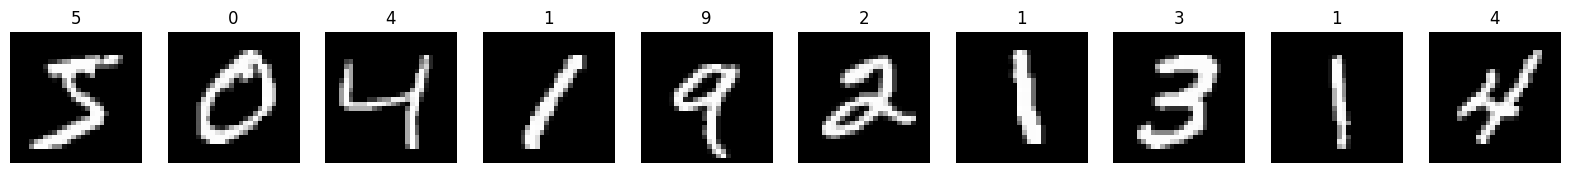

In [5]:
# Display the first 10 images
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(y_train[i])
    axes[i].axis('off') # Hide axes ticks
plt.show()

In [6]:
print(X_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


Como se puede observar, el dataset (en la parte de entrenamiento X_train) contiene 60000 objetos. Cada uno de ellos es una matriz de 28X28 y donde cada entrada de dicha matriz es un pixel que toma valores entre 0 (negro) y 255 (blanco). Como se observa en la imagen del la primera matriz (X_train[0]), la combinación de los pixeles es el número 5. A continuación se muestran los valores de los pixeles para el elemento X_train[0]:

In [7]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

En el dataset y_train se almacenan las etiquetas de la clase. Este dataset, por tanto, tiene 60,000 elementos y cada uno de ellos es la etiqueta de la imagen correspondiente del dataset X_train. Por ejemplo, el elemento X_train[0] contiene la combinacion de pixeles (matriz 28X28) del número 5. Por tanto, el valor correspondiente en y_train[0] contiene el valor de dicha etiqueta (5). A continuación se muestran el contenido de los primeros 10 valores de y_train que deben corresponder con las 10 primeras entradas de X_train:

In [8]:
contenido_y=[]
for i in range(10):
  contenido_y.append(y_train[i])
contenido_yInteger=np.array(contenido_y)
print(contenido_yInteger)


[5 0 4 1 9 2 1 3 1 4]


- Transformar las imágenes (matrices 28x28) en vectores unidimensionales para poder aplicar algoritmos tradicionales (Naïve Bayes, Árboles, KNN).

Los algoritmos que vamos a utilizar no trabajan con matrices, por lo que es necesario convertir la estructura 2D a 1D. Por tanto, debemos hacer que cada entrada de X_train ya no sea una matriz, sino un vector. Dado que dada matriz es de 28X28, al transportar la estructura 2D a 1D ahora cada entrada será un vector de tamaño de 784.

In [9]:
X_train_uni = X_train.reshape(X_train.shape[0], -1)
X_test_uni = X_test.reshape(X_test.shape[0], -1)

In [10]:
print(X_train_uni.shape)
print(X_train_uni[0].shape)

(60000, 784)
(784,)


Como se observa, en la nueva estructura X_train_uni tiene las 60,000 entradas pero cada una de ellas ahora es un vector de longitud 784. Esto lo vemos más claramente si observamos que el tamaño del primer elemento del nuevo dataset transformado X_train_uni[0] es precisamente 784.

  - Escalar los datos si fuera necesario.

Los casos multinomial y binomial se basan en conteos, por lo que los valores de 0 a 255 que puede tomar cada pixel no tienen mucho sentido. Por tanto, para estos dos casos (Multinominal y Binomial) podemos primero normalizar al intervalo [0,1] y posteriormente clasificar los valores mayores a 0,5 como 1 y los menores a 0,5 como 0 (binarizar). Los valores que sean clasificados como 0 seran aquellos asociados con color negro y los que tengan valor 1 estarán asociados al color blanco. Dicho de otra manera, el color negro se asocia al fondo de la imágen y el color blanco al trazo del número en la imágen.

**Caso Gausiano**

En este caso solo es necesario normalizar cada pixel al intervalo [0,1] ya que se asume que los datos siguen una distribución normal.


In [11]:
from sklearn.preprocessing import Binarizer

#Caso multinomial
binarizer = Binarizer(threshold=0.5)
X_train_MN = binarizer.transform(X_train_uni / 255.0)
X_test_MN = binarizer.transform(X_test_uni / 255.0)
#Caso binomial
X_train_BN = binarizer.transform(X_train_uni / 255.0)
X_test_BN = binarizer.transform(X_test_uni / 255.0)
#Caso Gaussiano
X_train_GN = X_train_uni / 255.0
X_test_GN = X_test_uni / 255.0

# 2. Modelado

  - Entrenar un modelo con el algoritmo Naïve Bayes (GaussianNB, MultinomialNB, etc.).

**Modelo Naive Bayes**

Entrenamos el modelo para los casos Bernoulli, Multinomial y Gausiano con los datos transformados de acuerdo con lo anterior y según para cada tipo de modelo. Además del entrenaminiento, aprovechamos para realizar las predicciones, recuperar la precisión (Accuracy),el tiempo de entrenamiento y las matrices de confusión. Esta información se utilizará más adelante para comparar con los modelos KNN y árbol de decisión.

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score
import time

# BernoulliNB
##Entrenamiento
start_timeBNB = time.time()  # Iniciar cronómetro
model_bernoulli = BernoulliNB()
model_bernoulli.fit(X_train_BN, y_train)
end_timeBNB = time.time()  # Detener cronómetro
#Prediccion
y_pred_bernoulli = model_bernoulli.predict(X_test_BN)
#Evaluacion
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
tiempo_BNB = end_timeBNB - start_timeBNB #tiempo en segundos
#Matriz de confusion
cm_bernoulli = confusion_matrix(y_test, y_pred_bernoulli)


# MultinomialNB
start_timeMNB = time.time()  # Iniciar cronómetro
model_multinomial = MultinomialNB()
model_multinomial.fit(X_train_MN, y_train)
end_timeMNB = time.time()  # Detener cronómetro
#Prediccion
y_pred_multinomial = model_multinomial.predict(X_test_MN)
#Evaluacion
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
tiempo_MNB = end_timeMNB - start_timeMNB #tiempo en segundos
#Matriz de confusion
cm_multinomial = confusion_matrix(y_test, y_pred_multinomial)

#GaussianNB
start_timeGNB = time.time()  # Iniciar cronómetro
model_gaussian = GaussianNB()
model_gaussian.fit(X_train_GN, y_train)
end_timeGNB = time.time()  # Detener cronómetro
#Prediccion
y_pred_gaussian = model_gaussian.predict(X_test_GN)
#Evaluacion
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
tiempo_GNB = end_timeGNB - start_timeGNB #tiempo en segundos
#Matriz de confusion
cm_gaussian = confusion_matrix(y_test, y_pred_gaussian)


  - Entrenar modelos con Árboles de Decisión y con K-Nearest Neighbors (KNN).

**Modelo KNN**

Este modelo lo puedo entrenar con los datos normalizados del caso gaussiano ya que es sensible a la escala de los datos.

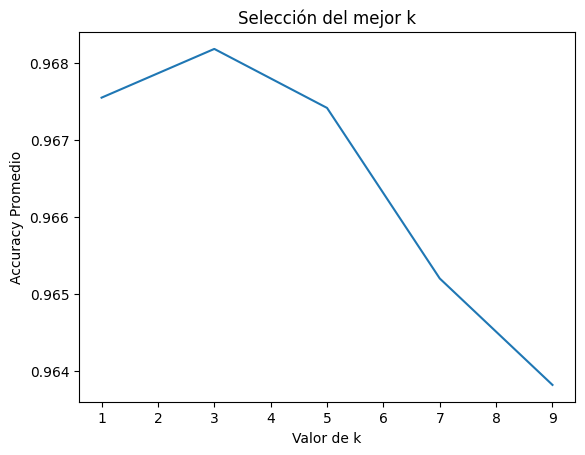

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Lista para almacenar los resultados
k_values = list(range(1, 10, 2))  # Probamos k=1, 3, 5, ..., 10
accuracies = []

# Probar cada k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X_train_GN, y_train, cv=3, scoring='accuracy')
    accuracies.append(scores.mean())

# Graficar resultados
plt.plot(k_values, accuracies)
plt.xlabel("Valor de k")
plt.ylabel("Accuracy Promedio")
plt.title("Selección del mejor k")
plt.show()


Como se observa, el valor de k con la mayor precisión es 3. Entonces procedemos a entrenar el modelo KNN con tres vecinos.

In [15]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Entrenar modelo
start_timeKNN = time.time()  # Iniciar cronómetro
model_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model_knn.fit(X_train_GN, y_train)
end_timeKNN = time.time()  # Detener cronómetro
#Prediccion
y_pred_knn = model_knn.predict(X_test_GN)
#Evaluacion
accuracy_knn = accuracy_score(y_test, y_pred_knn)
tiempo_KNN = end_timeKNN - start_timeKNN #tiempo en segundos
#Matriz de confusion
cm_knn = confusion_matrix(y_test, y_pred_knn)

**Modelo àrbol de decisión**

Antes de entrenar el modelo de árbol de decisión, debemos elegir el parámetro de profundidad para evitar sobreajuste o subajuste. A continuación se elije el parámetro de profundidad del árbol.

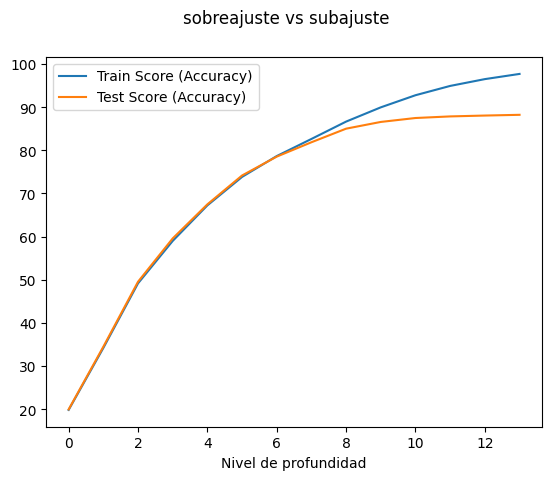

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(1,15)):
  tree_model = DecisionTreeClassifier(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train_uni, y_train)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train_uni, y_train))
  score_test_list.append(100.0*tree_model.score(X_test_uni, y_test))

df = pd.DataFrame({"max_depth":md_list,
                   "score_train":score_train_list,
                   "score_test":score_test_list})

df.set_index("max_depth")
df["score_train"].plot(label="Train Score (Accuracy)")
df["score_test"].plot(label="Test Score (Accuracy)")
plt.suptitle("sobreajuste vs subajuste")
plt.xlabel("Nivel de profundidad")
plt.legend()
plt.show();

Como se observa, para niveles bajos de profundidad (entre 1 y 5) el modelo tiene poca precisión (inferior al 70%). Para valores elevados de profundidad el arbol se vuelve complejo y la precisión del entrenamiento es casi del 100%, lo que indica un sobreajuste. Otra forma de verlo es que mientras la precisión con los datos de entrenamiento es del 100%, la precisión en los datos de prueba es inferior al 90%. Una profundidad de 8 se considera adecuada para evitar tanto el sobreajuste como el subajuste ya que la precisión tanto para los datos de entrenamiento como para los datos de prueba es superior al 80%.

A continuación se entrena el modelo de árbol de decisión con un nivel de profundidad de 8.

In [17]:
import time
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Entrenar modelo
start_timeDT = time.time()  # Iniciar cronómetro
model_arbol = DecisionTreeClassifier(random_state=0, max_depth=8)
model_arbol.fit(X_train_uni, y_train)
end_timeDT = time.time()  # Detener cronómetro
#Prediccion
y_pred_arbol = model_arbol.predict(X_test_uni)
#Evaluacion
accuracy_arbol = accuracy_score(y_test, y_pred_arbol)
tiempo_DT = end_timeDT - start_timeDT #tiempo en segundos
#Matriz de confusion
cm_arbol = confusion_matrix(y_test, y_pred_arbol)

  - Comparar su rendimiento (accuracy y tiempo de entrenamiento).
  A continuación comparo los modelos en cuanto a la precisión y el tiempo de ejecución en el entrenamiento de cada uno de ellos.

In [18]:
# Crear DataFrame
Columnas = ['Modelo', 'Accuracy', 'Tiempo (segundos)']
datos = [
    ['NB Bernoulli', 100*accuracy_bernoulli, tiempo_BNB],
    ['NB Multinomial', 100*accuracy_multinomial, tiempo_MNB],
    ['NB Gaussian', 100*accuracy_gaussian, tiempo_GNB],
    ['KNN', 100*accuracy_knn, tiempo_KNN],
    ['Decision Tree', 100*accuracy_arbol, tiempo_DT]
]
resultados = pd.DataFrame(datos, columns=Columnas)
resultados=resultados.sort_values(by="Accuracy", ascending=False)

# Mostrar DataFrame
print(resultados)

           Modelo  Accuracy  Tiempo (segundos)
3             KNN     97.05           0.059492
0    NB Bernoulli     84.27           0.825493
1  NB Multinomial     83.56           0.279969
4   Decision Tree     81.86          15.643475
2     NB Gaussian     55.58           0.984706


De acuerdo con la precisión de cada modelo, en términos de tiempo, el entrenamiento del modelo KNN es el más eficiente, aunque debe considerarse que la precisión de dicho modelo depende del número de vecinos (k) óptimo. La determinación de este parámetro requiere un procesamiento adicional qu podría incrementar el tiempo total de entretaniento del modelo. El modelo más tardado es el arbol de decisión. Esto puede deberse al parámetro de profundidad, entre mayor sea la profundidad del arbol, se vuelve más complejo y por tanto su entrenamiento requiere de mayor tiempo.

En términos de precisión (Accurary), también el modelo KNN es el mejor. De hecho, el 97% clasifica correctamente. Después de KNN, el modelo que mejor predice y que toma menos tiempo entrenar, es el modelo Naive Bayes Bernoulli. El modelo logra predecir correctamente las imágenes en el 84,27% de las veces. La precisión en este caso se afecta debido a que las imágenes son números trazados manualmente y a que este modelo solo identifica 1 y 0 para precedir, lo que podría ocasionar que algunos trazos sean similares en términos de 1 y 0.

El modelo menos preciso en términos de "Accuracy" es el Naive Bayes Gaussian. Esto puede deberse a que asume que la distribución de los pixeles en cada imagen es normal.

#3. Evaluación

  - Calcular Accuracy para cada modelo.

  El Accuracy de cada modelo fue mostrado en el análisis anterior, pero se muestra nuevamente en la siguiente tabla.
  

In [19]:
# Mostrar DataFrame
print(resultados)


           Modelo  Accuracy  Tiempo (segundos)
3             KNN     97.05           0.059492
0    NB Bernoulli     84.27           0.825493
1  NB Multinomial     83.56           0.279969
4   Decision Tree     81.86          15.643475
2     NB Gaussian     55.58           0.984706


  - Mostrar la matriz de confusión para los tres algoritmos.

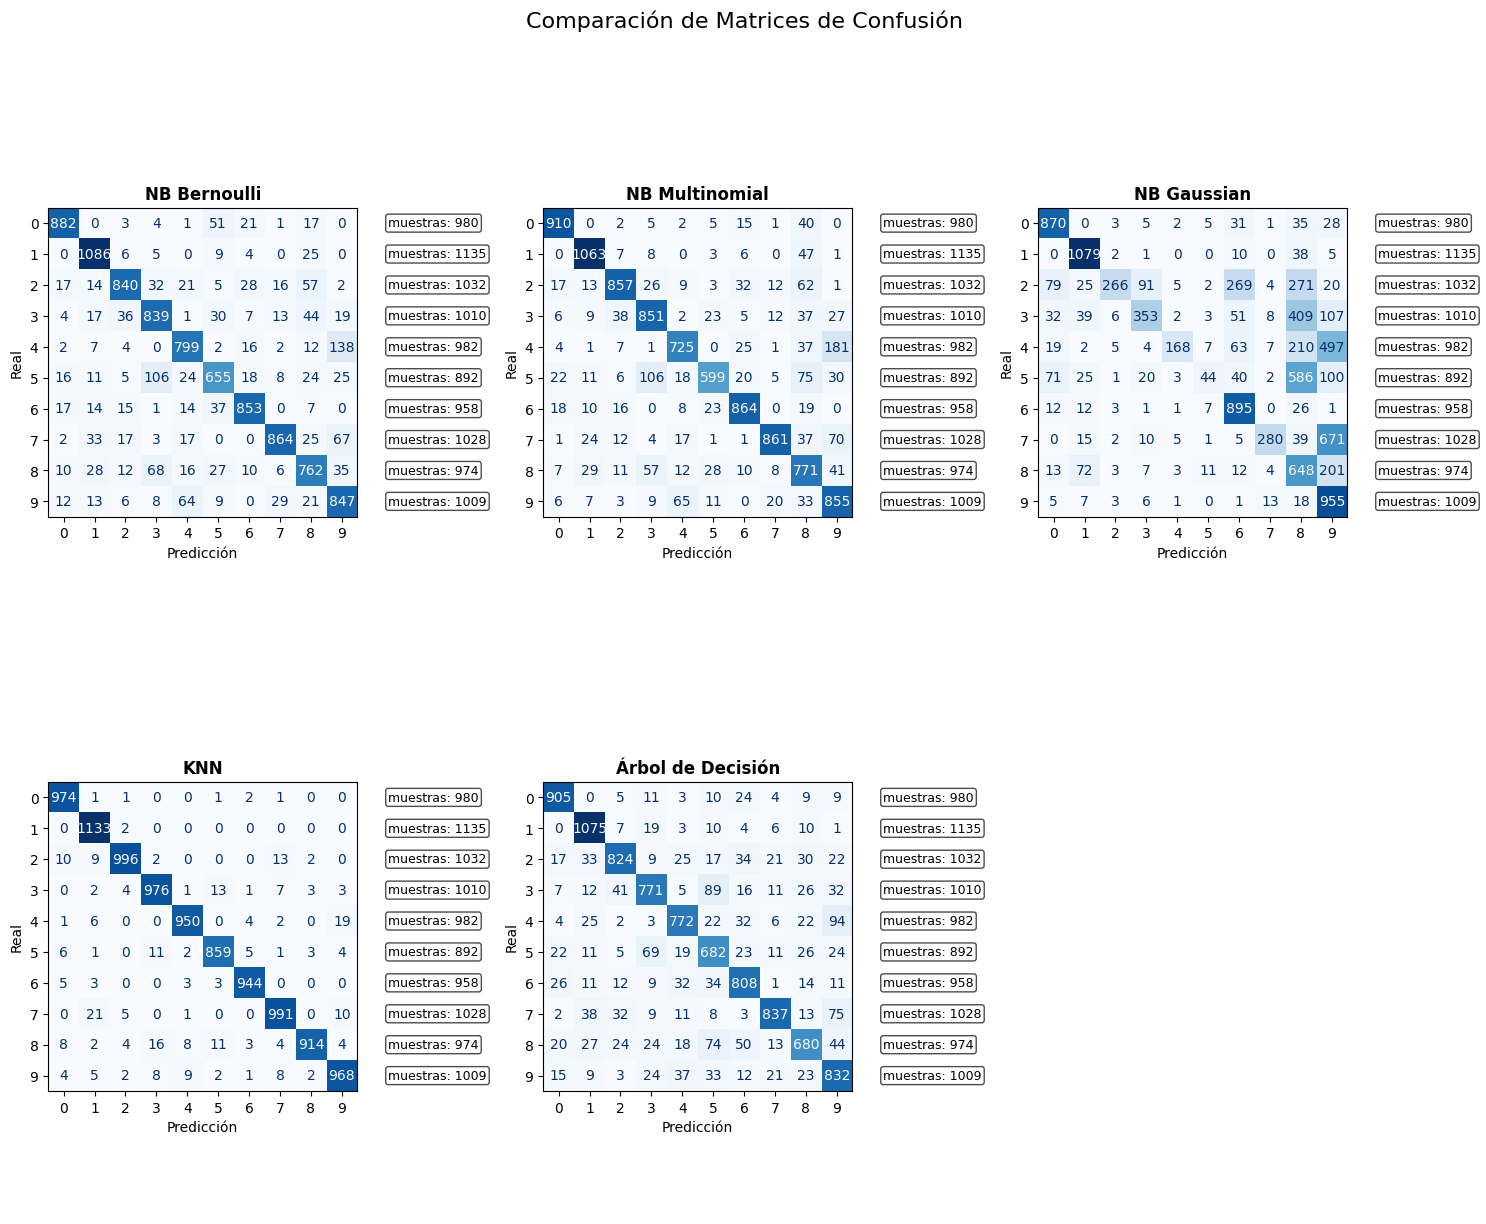

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np

# Configuración del gráfico (2 filas x 3 columnas)
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
fig.suptitle("Comparación de Matrices de Confusión", fontsize=16, y=1.02)

# Lista de modelos y sus matrices (en el mismo orden)
models = {
    "NB Bernoulli": cm_bernoulli,
    "NB Multinomial": cm_multinomial,
    "NB Gaussian": cm_gaussian,
    "KNN": cm_knn,
    "Árbol de Decisión": cm_arbol
    }


# Generar cada subgráfico
for ax, (model_name, cm) in zip(axes.flatten(), models.items()):
    samples_per_class = cm.sum(axis=1)   # Calcular total de muestras por clase (suma por fila)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(model_name, fontweight='bold')  # Añade el nombre del modelo
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

    # Añadir anotación con total de muestras a la derecha de cada fila
    for i in range(10):
        ax.text(10.5, i, f"muestras: {samples_per_class[i]}",
                ha='left', va='center', fontsize=9,
                bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))

# Ajustar espacios y mostrar
if len(models) < 6:
    axes[-1, -1].axis('off') #ocultar espacio no utilizado

plt.tight_layout()
plt.show()

  - Comentar las ventajas y limitaciones de cada uno (velocidad, precisión, interpretabilidad, etc.).

De acuerdo con las matrices de confusión, el modelo KNN es el que tiene mejor capadidad de predecir cada dígito (1-9) correctamente. Como ejemplo, el dígito 1 lo predice correctamente en el 99,8% (1133/1135) de las veces. El número 4, lo predice correctamente en el 96% (950/982) de las veces. Sólo lo confunde incorrectamente como 9 en el 1,9% (19/982) de las veces.

Los modelos Naive Bayes Bernoulli y Multinomial son los siguientes mejores para predecir cada dígito. El modelo Bernoulli tiende a equivocarse con mayor frecuencia únicamente en clasificar el 4 y el 5. El 4 lo confunde con el 9 el 14% de las veces mientras que el 5 lo confunde con el 3 el 11,8% de las veces. Estos mismos valores son los mismos que el modelo Multinomial tambien clasifica erroneamente con mayor frecuencia. El 4 lo clasifica incorrectamente con el 9 el 18,4% de las veces mientras que el 5 lo clasifica como 3 en el 11,8% de los casos.

El modelo que tiene menor capacidad de predecir cada dígito es el gaussiano. Este modelo tiende a predecir mayor cantidad de dígitos incorrectamente. Los dígitos 2, 3, 4, 5, 7 y 8 tienen tasas de predicción de 25.77%, 34.95%, 17.10%, 4.93%, 27.23% y 66.53%, respectivamente.

Finalmente, en el modelo de árbol de decisión no se observa algún dígito que tenga un alto grado de error de predicción. Los dígitos un poco más problemáticos de predecir correctamente en este modelo son el 3 y 4. Aún así, los predice correctamente con una tasa de 76.33% y 78.6%, respectivamente.

De acuerdo con su capacidad predictiva y el tiempo de entretamiento, el modelo KNN es el mejor. Sin embargo, el proceso de la elección del número óptimo de vecinos incrementa el tiempo total de su aplicación.

Los modelos Naive Bayes Bernoulli y Multinomial son los que le siguen en capacidad predictiva (Accuracy) y tiempo de entrenamiento. Estos dos modelos además, maximizan la información de cada atributo para predecir la clase a través de la función MAP. El modelo gaussiano es menos preciso y el tiempo de entrenamiento es elevado.

Al igual que el modelo KNN, el modelo de árbol de decisión también depende de la profundidad que se elija. Esto tambien incrementa el tiempo de implementar el modelo. Además en este modelo existe riesgo de sobrajuste o de subajuste.

En términos de interpretabilidad, los modelos de Árboles de decisión, KNN, Bernoulli y Multinomial son sencillos de interpretar. En el caso de los modelos Bernoulli, Multinomial y Gaussian la consideración importante que debe hacerse es que son modelos Naive Bayes por lo que suponen independencia en la distribución de los atributos. En el caso del modelo Gaussiano, además supone que los pixeles se distribuyen normalmente.

Con Base en lo anterior, los modelos Bernoulli, Multinomial, KNN y el àrbol de decisión son sencillos de entender. Aunque la necesidad de ajustar los parámetros del número de vecinos (en el caso de KNN) y la profundidad del arbol, ponen a estos modelos en desventaja de los modelos Bernoulli y Multinomial a la hora de implementarlos en la práctica.